<a href="https://colab.research.google.com/github/Mikhail-068/Scoring/blob/%D0%9B%D0%B5%D0%BE%D0%BD%D1%82%D1%8C%D0%B5%D0%B2%D0%B0-%D0%95%D0%BA%D0%B0%D1%82%D0%B5%D1%80%D0%B8%D0%BD%D0%B0/%D0%A1%D0%BA%D0%BE%D1%80%D0%B8%D0%BD%D0%B3_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_2%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B0_%D0%92%D1%81%D1%8F_Cat_%D0%9B%D0%B5%D0%BE%D0%BD%D1%82%D1%8C%D0%B5%D0%B2%D0%B0_ipynb%22%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler # Масштабирование данных

In [3]:
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop, Nadam # Оптимизаторы
import re # Регулярные выражения
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
from sklearn.model_selection import train_test_split

In [4]:
from keras.models import load_model

In [5]:
import re
from tabulate import tabulate

##Подключение баз.

In [6]:
!apt-get install p7zip-full
!7z x '/content/gdrive/MyDrive/Colab Notebooks/2 класса/архив/X_Y_Scaled 2 classes.zip' -o/content/2_Classes

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/MyDrive/Colab Notebooks/2 класса/архив/                                                                            1 file, 68995228 bytes (66 MiB)

Extracting archive: /content/gdrive/MyDrive/Colab Notebooks/2 класса/архив/X_Y_Scaled 2 classes.zip
--
Path = /content/gdrive/MyDrive/Colab Notebooks/2 класса/архив/X_Y_Scaled 2 classes.zip
Type = zip
Physical Size = 68995228

In [7]:
x_train = np.load('/content/2_Classes/x_train.npy')
y_train = np.load('/content/2_Classes/y_train.npy')
x_val = np.load('/content/2_Classes/x_val.npy')
y_val = np.load('/content/2_Classes/y_val.npy')

In [8]:
x_test = np.load('/content/2_Classes/x_test.npy')
y_test = np.load('/content/2_Classes/y_test.npy')

In [9]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_val', x_val.shape)
print('y_val', y_val.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (2483963, 37)
y_train (2483963, 4)
x_val (672489, 37)
y_val (672489, 4)
x_test (768251, 37)
y_test (768251, 4)


In [10]:
display(y_train)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

#Модель1 (selu, Nadam, Dence (64,32,4)) = test 96,3%

In [11]:

number_of_cols = x_train.shape[1]

model12_cl = Sequential() # Последовательная модель нейронной сети

model12_cl.add(Dense(64, input_dim=number_of_cols, activation='selu'))
#model12_cl.add(BatchNormalization())
model12_cl.add(Dense(32, activation='selu'))
#model12_cl.add(Dense(32, activation='relu'))
model12_cl.add(Dense(4, activation='softmax'))

model12_cl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,644
Trainable params: 4,644
Non-trainable params: 0
_________________________________________________________________


In [12]:
model12_cl.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [13]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 4), (672489, 37), (672489, 4))

Epoch 1/20
9703/9703 [==============================] - 52s 5ms/step - loss: 0.3910 - accuracy: 0.8779 - val_loss: 0.1831 - val_accuracy: 0.9242
Epoch 2/20
9703/9703 [==============================] - 39s 4ms/step - loss: 0.1622 - accuracy: 0.9349 - val_loss: 0.1577 - val_accuracy: 0.9337
Epoch 3/20
9703/9703 [==============================] - 32s 3ms/step - loss: 0.1425 - accuracy: 0.9419 - val_loss: 0.1354 - val_accuracy: 0.9442
Epoch 4/20
9703/9703 [==============================] - 34s 4ms/step - loss: 0.1294 - accuracy: 0.9459 - val_loss: 0.1221 - val_accuracy: 0.9477
Epoch 5/20
9703/9703 [==============================] - 43s 4ms/step - loss: 0.1190 - accuracy: 0.9491 - val_loss: 0.1133 - val_accuracy: 0.9525
Epoch 6/20
9703/9703 [==============================] - 31s 3ms/step - loss: 0.1101 - accuracy: 0.9522 - val_loss: 0.1075 - val_accuracy: 0.9525
Epoch 7/20
9703/9703 [==============================] - 30s 3ms/step - loss: 0.1019 - accuracy: 0.9548 - val_loss: 0.1004 - val_ac

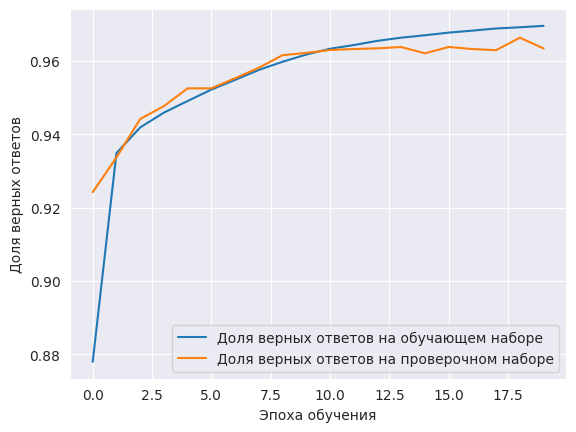

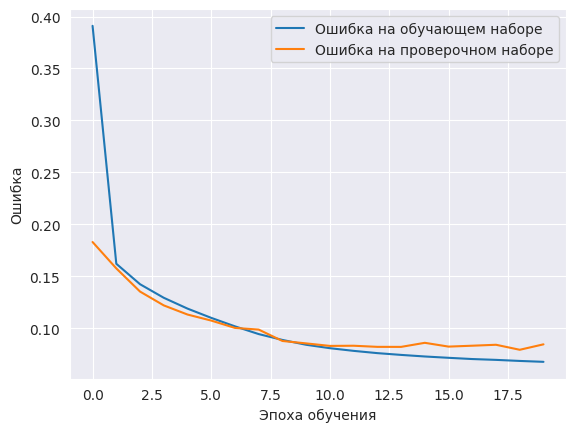

In [14]:
import time
start_time = time.time() # счетчик времени
history = model12_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=256,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [15]:
model12_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model12_db_bal_new.keras')

In [16]:
loss, acc12 = model12_cl.evaluate(x_test, y_test, verbose=0) #classification

In [17]:
acc12

0.963310182094574

24008/24008 [==============================] - 36s 1ms/step
[[354800  10173]
 [ 18014 385264]]


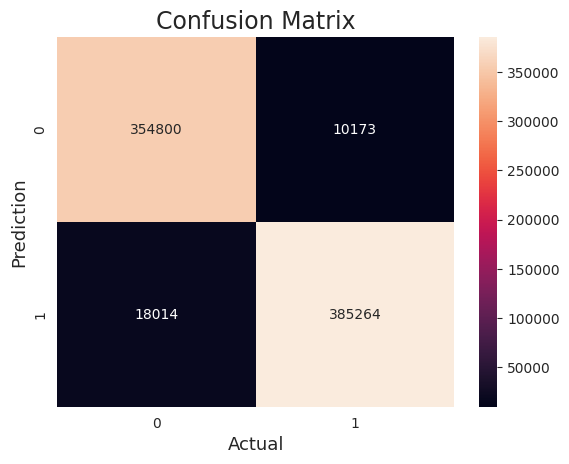

Accuracy   : 0.9633101681611869


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model12_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

#Модель 2 (selu, SGD, Dence(512,256,4)) =  test 90,7%

In [19]:
number_of_cols = x_train.shape[1]

model2_cl = Sequential() # Последовательная модель нейронной сети

model2_cl.add(Dense(512, input_dim=number_of_cols, activation='selu'))

model2_cl.add(Dense(256, activation='selu'))

#model2_cl.add(Dense(128, activation='selu'))

model2_cl.add(Dense(4, activation='softmax'))

model2_cl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               19456     
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 151,812
Trainable params: 151,812
Non-trainable params: 0
_________________________________________________________________


In [20]:
model2_cl.compile(optimizer=SGD(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [21]:
x_train.shape, y_train.shape

((2483963, 37), (2483963, 4))

Epoch 1/20
9703/9703 [==============================] - 107s 11ms/step - loss: 0.4264 - accuracy: 0.8309 - val_loss: 0.3357 - val_accuracy: 0.8751
Epoch 2/20
9703/9703 [==============================] - 107s 11ms/step - loss: 0.3256 - accuracy: 0.8790 - val_loss: 0.3039 - val_accuracy: 0.8864
Epoch 3/20
9703/9703 [==============================] - 107s 11ms/step - loss: 0.3063 - accuracy: 0.8846 - val_loss: 0.3068 - val_accuracy: 0.9035
Epoch 4/20
9703/9703 [==============================] - 114s 12ms/step - loss: 0.2990 - accuracy: 0.8870 - val_loss: 0.2906 - val_accuracy: 0.8939
Epoch 5/20
9703/9703 [==============================] - 116s 12ms/step - loss: 0.2954 - accuracy: 0.8881 - val_loss: 0.2935 - val_accuracy: 0.8807
Epoch 6/20
9703/9703 [==============================] - 107s 11ms/step - loss: 0.2926 - accuracy: 0.8889 - val_loss: 0.2931 - val_accuracy: 0.8804
Epoch 7/20
9703/9703 [==============================] - 106s 11ms/step - loss: 0.2901 - accuracy: 0.8897 - val_loss: 0

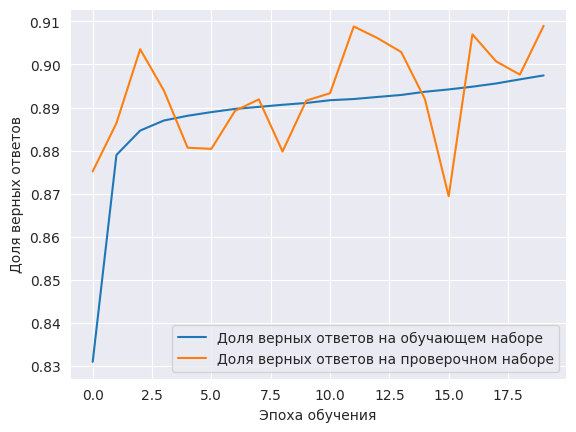

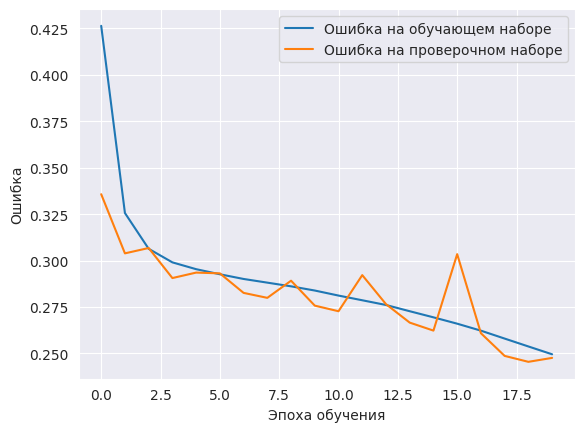

In [22]:
import time
start_time = time.time() # счетчик времени
history = model2_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=256,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [23]:
model2_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model2_db_bal_new.keras')

In [24]:
print(type(history))
print(type(history.history))
print(history.history.keys())

<class 'keras.callbacks.History'>
<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [27]:
loss, acc = model2_cl.evaluate(x_test, y_test, verbose=0) #classification

In [28]:
print(type(acc))
print(acc)

<class 'float'>
0.9069822430610657


In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

24008/24008 [==============================] - 53s 2ms/step
[[325134  39839      0]
 [ 31621 371656      1]
 [     0      0      0]]


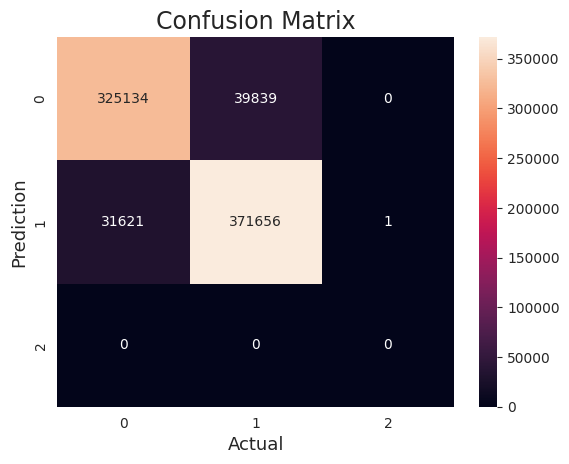

Accuracy   : 0.9069822232577635


In [30]:
# compute the confusion matrix
y_pred=model2_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

# Модель3 (elu, SGD, Dence (512,256,4)) = test 89,7%

In [20]:
number_of_cols = x_train.shape[1]

model3_cl = Sequential() # Последовательная модель нейронной сети

model3_cl.add(Dense(512, input_dim=number_of_cols, activation='elu'))

model3_cl.add(Dense(256, activation='elu'))

#model3_cl.add(Dense(128, activation='elu'))

model3_cl.add(Dense(4, activation='softmax'))

model3_cl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               19456     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 151,812
Trainable params: 151,812
Non-trainable params: 0
_________________________________________________________________


In [21]:
model3_cl.compile(optimizer=SGD(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [22]:
x_train.shape, y_train.shape, y_test.shape

((2483963, 37), (2483963, 4), (768251, 4))

Epoch 1/20
9703/9703 [==============================] - 107s 11ms/step - loss: 0.4479 - accuracy: 0.8382 - val_loss: 0.3645 - val_accuracy: 0.8713
Epoch 2/20
9703/9703 [==============================] - 105s 11ms/step - loss: 0.3437 - accuracy: 0.8723 - val_loss: 0.3231 - val_accuracy: 0.8860
Epoch 3/20
9703/9703 [==============================] - 99s 10ms/step - loss: 0.3184 - accuracy: 0.8805 - val_loss: 0.3079 - val_accuracy: 0.8836
Epoch 4/20
9703/9703 [==============================] - 104s 11ms/step - loss: 0.3093 - accuracy: 0.8835 - val_loss: 0.3029 - val_accuracy: 0.8895
Epoch 5/20
9703/9703 [==============================] - 111s 11ms/step - loss: 0.3052 - accuracy: 0.8851 - val_loss: 0.3024 - val_accuracy: 0.8937
Epoch 6/20
9703/9703 [==============================] - 106s 11ms/step - loss: 0.3028 - accuracy: 0.8858 - val_loss: 0.2987 - val_accuracy: 0.8837
Epoch 7/20
9703/9703 [==============================] - 100s 10ms/step - loss: 0.3011 - accuracy: 0.8864 - val_loss: 0.

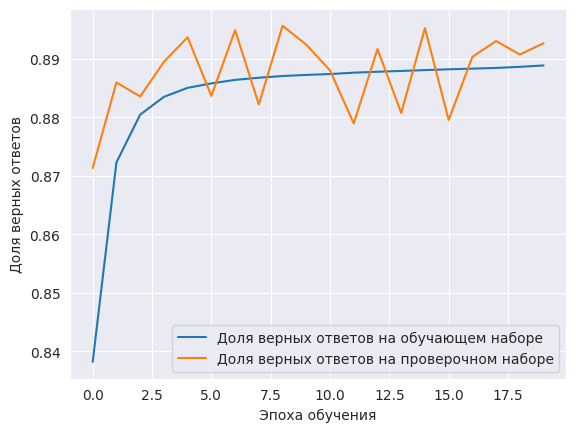

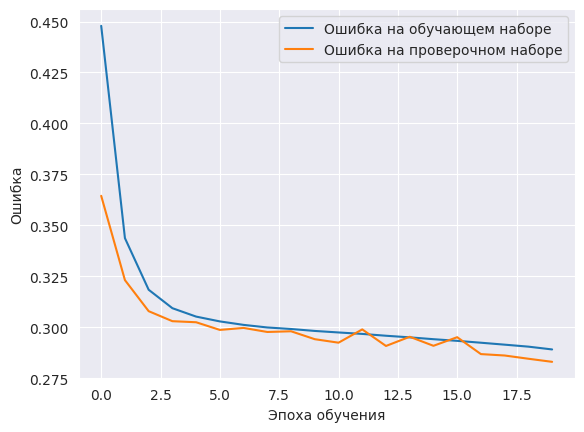

In [23]:
import time
start_time = time.time() # счетчик времени
history = model3_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=256,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [24]:
model3_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model3_db_bal_new.keras')

In [25]:
print(type(history))
print(type(history.history))
print(history.history.keys())

<class 'keras.callbacks.History'>
<class 'dict'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [26]:
loss, acc3 = model3_cl.evaluate(x_test, y_test, verbose=0) #classification

In [28]:
print(type(acc3))
print(acc3)

<class 'float'>
0.8973369598388672


In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

24008/24008 [==============================] - 44s 2ms/step
[[339771  25202      0]
 [ 53668 349609      1]
 [     0      0      0]]


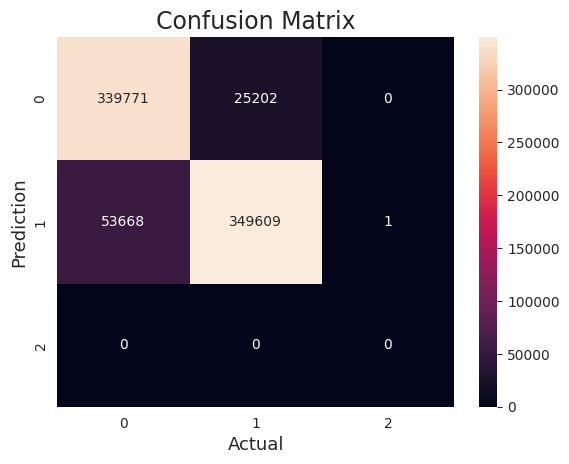

Accuracy   : 0.8973369380580045


In [30]:
# compute the confusion matrix
y_pred=model3_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

#Модель4 (selu, SGD, Dence (64,32,4)) = test 90,56%

In [31]:

number_of_cols = x_train.shape[1]

model4_cl = Sequential() # Последовательная модель нейронной сети

model4_cl.add(Dense(64, input_dim=number_of_cols, activation='selu'))
#model4_cl.add(BatchNormalization())
model4_cl.add(Dense(32, activation='selu'))
#model4_cl.add(Dense(32, activation='relu'))
model4_cl.add(Dense(4, activation='softmax'))

model4_cl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2432      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,644
Trainable params: 4,644
Non-trainable params: 0
_________________________________________________________________


In [32]:
model4_cl.compile(optimizer=SGD(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [33]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 4), (672489, 37), (672489, 4))

Epoch 1/20
9703/9703 [==============================] - 45s 4ms/step - loss: 0.4849 - accuracy: 0.8167 - val_loss: 0.4005 - val_accuracy: 0.8539
Epoch 2/20
9703/9703 [==============================] - 26s 3ms/step - loss: 0.3695 - accuracy: 0.8616 - val_loss: 0.3447 - val_accuracy: 0.8775
Epoch 3/20
9703/9703 [==============================] - 25s 3ms/step - loss: 0.3271 - accuracy: 0.8769 - val_loss: 0.3162 - val_accuracy: 0.8804
Epoch 4/20
9703/9703 [==============================] - 25s 3ms/step - loss: 0.3058 - accuracy: 0.8828 - val_loss: 0.3026 - val_accuracy: 0.8837
Epoch 5/20
9703/9703 [==============================] - 28s 3ms/step - loss: 0.2950 - accuracy: 0.8861 - val_loss: 0.2949 - val_accuracy: 0.8845
Epoch 6/20
9703/9703 [==============================] - 27s 3ms/step - loss: 0.2875 - accuracy: 0.8882 - val_loss: 0.2893 - val_accuracy: 0.8834
Epoch 7/20
9703/9703 [==============================] - 27s 3ms/step - loss: 0.2816 - accuracy: 0.8896 - val_loss: 0.2867 - val_ac

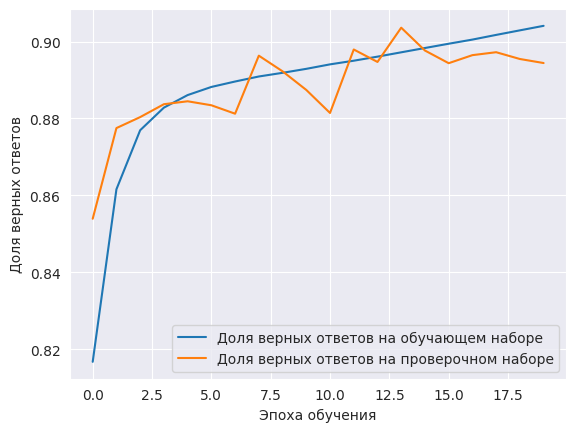

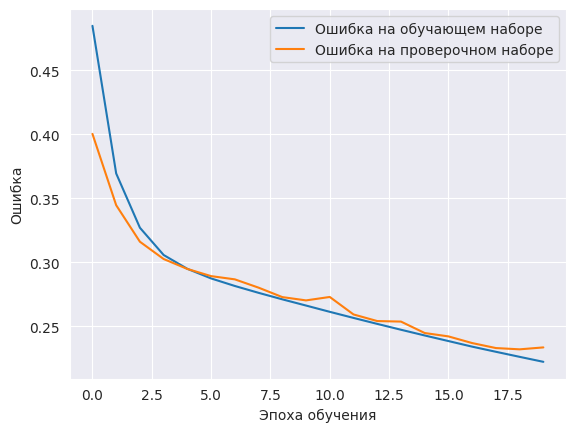

In [34]:
import time
start_time = time.time() # счетчик времени
history = model4_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=256,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [35]:
model4_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model4_db_bal_new.keras')

In [38]:
loss, acc4 = model4_cl.evaluate(x_test, y_test, verbose=0) #classification

In [ ]:
acc4

0.9056298136711121

24008/24008 [==============================] - 40s 2ms/step
[[338021  26952]
 [ 45548 357730]]


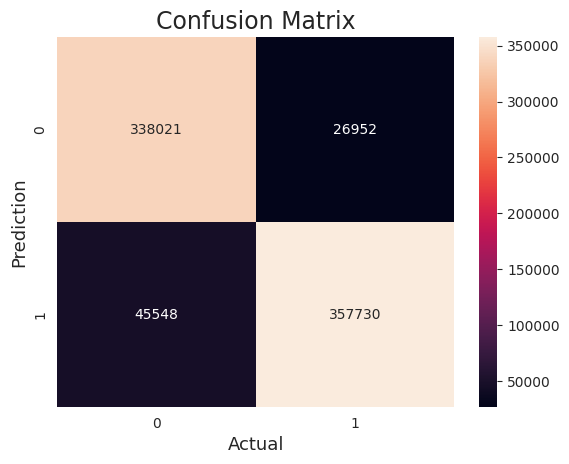

Accuracy   : 0.9056298006771224


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model4_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

#Модель5 (elu, Nadam, Dence (64,32,4)) = test 95,9%

In [39]:

number_of_cols = x_train.shape[1]

model5_cl = Sequential() # Последовательная модель нейронной сети

model5_cl.add(Dense(64, input_dim=number_of_cols, activation='elu'))
#model5_cl.add(BatchNormalization())
model5_cl.add(Dense(32, activation='elu'))
#model5_cl.add(Dense(32, activation='relu'))
model5_cl.add(Dense(4, activation='softmax'))

model5_cl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                2432      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,644
Trainable params: 4,644
Non-trainable params: 0
_________________________________________________________________


In [40]:
model5_cl.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [41]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 4), (672489, 37), (672489, 4))

Epoch 1/20
9703/9703 [==============================] - 32s 3ms/step - loss: 0.4397 - accuracy: 0.8744 - val_loss: 0.1873 - val_accuracy: 0.9197
Epoch 2/20
9703/9703 [==============================] - 32s 3ms/step - loss: 0.1671 - accuracy: 0.9336 - val_loss: 0.1470 - val_accuracy: 0.9414
Epoch 3/20
9703/9703 [==============================] - 30s 3ms/step - loss: 0.1364 - accuracy: 0.9428 - val_loss: 0.1274 - val_accuracy: 0.9447
Epoch 4/20
9703/9703 [==============================] - 30s 3ms/step - loss: 0.1205 - accuracy: 0.9481 - val_loss: 0.1153 - val_accuracy: 0.9530
Epoch 5/20
9703/9703 [==============================] - 29s 3ms/step - loss: 0.1106 - accuracy: 0.9519 - val_loss: 0.1112 - val_accuracy: 0.9542
Epoch 6/20
9703/9703 [==============================] - 29s 3ms/step - loss: 0.1037 - accuracy: 0.9542 - val_loss: 0.1098 - val_accuracy: 0.9563
Epoch 7/20
9703/9703 [==============================] - 30s 3ms/step - loss: 0.0987 - accuracy: 0.9558 - val_loss: 0.1053 - val_ac

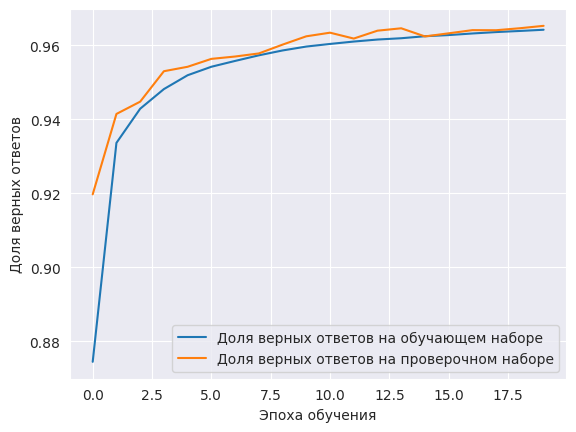

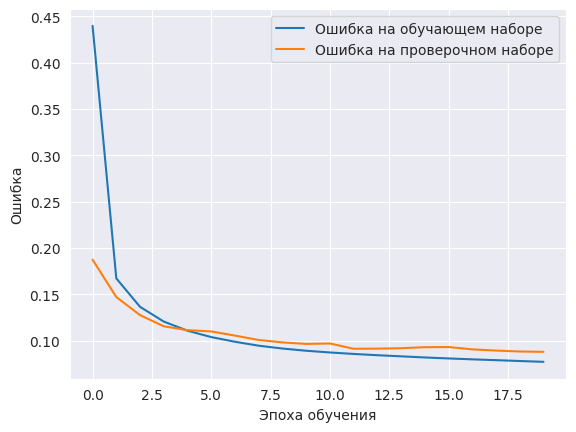

In [42]:
import time
start_time = time.time() # счетчик времени
history = model5_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=256,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [43]:
model5_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model_db_bal5_new.keras')

In [44]:
loss, acc5 = model5_cl.evaluate(x_test, y_test, verbose=0) #classification

In [45]:
acc5

0.9591227173805237

24008/24008 [==============================] - 34s 1ms/step
[[345986  18987]
 [ 12417 390861]]


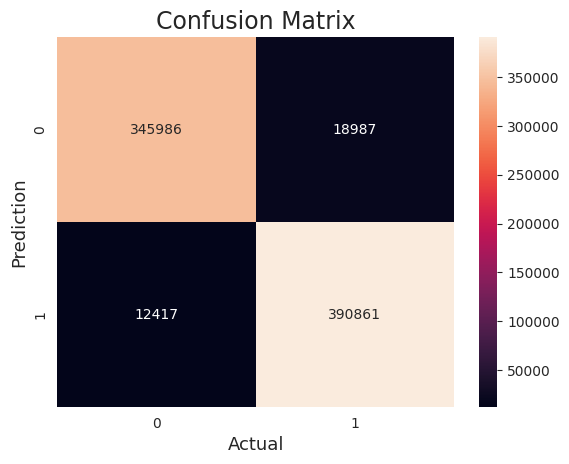

Accuracy   : 0.9591227346270945


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model5_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

#Модель6 (selu, Nadam, Dence (64,32,4)) = test 96,4% (Модель 1 + уменьшен batch_size до 64)

In [47]:

number_of_cols = x_train.shape[1]

model6_cl = Sequential() # Последовательная модель нейронной сети

model6_cl.add(Dense(64, input_dim=number_of_cols, activation='selu'))
#model6_cl.add(BatchNormalization())
model6_cl.add(Dense(32, activation='selu'))
#model6_cl.add(Dense(32, activation='relu'))
model6_cl.add(Dense(4, activation='softmax'))

model6_cl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                2432      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 4)                 132       
                                                                 
Total params: 4,644
Trainable params: 4,644
Non-trainable params: 0
_________________________________________________________________


In [48]:
model6_cl.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [49]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 4), (672489, 37), (672489, 4))

Epoch 1/20
38812/38812 [==============================] - 122s 3ms/step - loss: 0.1894 - accuracy: 0.9239 - val_loss: 0.1462 - val_accuracy: 0.9388
Epoch 2/20
38812/38812 [==============================] - 109s 3ms/step - loss: 0.1185 - accuracy: 0.9500 - val_loss: 0.1121 - val_accuracy: 0.9537
Epoch 3/20
38812/38812 [==============================] - 98s 3ms/step - loss: 0.0993 - accuracy: 0.9570 - val_loss: 0.0959 - val_accuracy: 0.9573
Epoch 4/20
38812/38812 [==============================] - 98s 3ms/step - loss: 0.0892 - accuracy: 0.9605 - val_loss: 0.0894 - val_accuracy: 0.9605
Epoch 5/20
38812/38812 [==============================] - 98s 3ms/step - loss: 0.0838 - accuracy: 0.9626 - val_loss: 0.0958 - val_accuracy: 0.9575
Epoch 6/20
38812/38812 [==============================] - 98s 3ms/step - loss: 0.0802 - accuracy: 0.9640 - val_loss: 0.0827 - val_accuracy: 0.9653
Epoch 7/20
38812/38812 [==============================] - 106s 3ms/step - loss: 0.0774 - accuracy: 0.9651 - val_loss

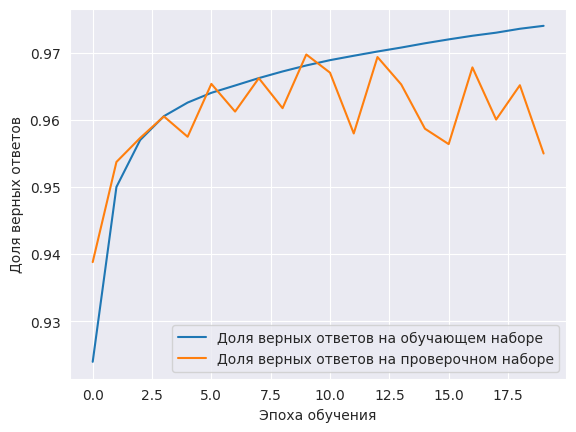

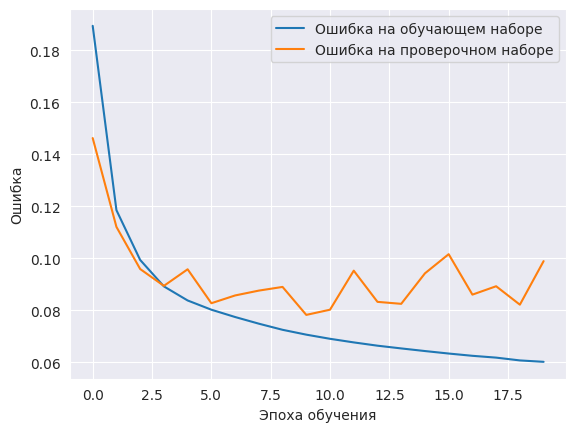

In [50]:
import time
start_time = time.time() # счетчик времени
history = model6_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=64,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [51]:
model6_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model6_db_bal_new.keras')

In [54]:
loss, acc6 = model6_cl.evaluate(x_test, y_test, verbose=0) #classification

In [ ]:
acc6

0.963310182094574

24008/24008 [==============================] - 32s 1ms/step
[[354372  10601]
 [ 16645 386633]]


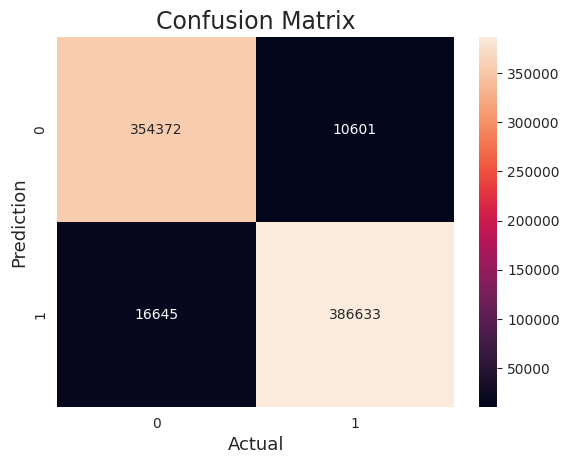

Accuracy   : 0.9645350282655017


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model6_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

#Модель7 (selu, Nadam, Dence (64,32,4)) = test 96,3% (Модель 1 + BatchNormalization)

In [60]:

number_of_cols = x_train.shape[1]

model7_cl = Sequential() # Последовательная модель нейронной сети

model7_cl.add(Dense(64, input_dim=number_of_cols, activation='selu'))
model7_cl.add(BatchNormalization())
model7_cl.add(Dense(32, activation='selu'))
model7_cl.add(BatchNormalization())
#model7_cl.add(Dense(32, activation='relu'))
model7_cl.add(Dense(4, activation='softmax'))

model7_cl.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                2432      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 4)                 132       
                                                                 
Total params: 5,028
Trainable params: 4,836
Non-traina

In [61]:
model7_cl.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [62]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 4), (672489, 37), (672489, 4))

Epoch 1/20
9703/9703 [==============================] - 45s 4ms/step - loss: 0.2521 - accuracy: 0.9108 - val_loss: 0.2466 - val_accuracy: 0.9209
Epoch 2/20
9703/9703 [==============================] - 39s 4ms/step - loss: 0.0912 - accuracy: 0.9635 - val_loss: 0.3477 - val_accuracy: 0.9155
Epoch 3/20
9703/9703 [==============================] - 38s 4ms/step - loss: 0.0621 - accuracy: 0.9779 - val_loss: 0.4641 - val_accuracy: 0.9077
Epoch 4/20
9703/9703 [==============================] - 38s 4ms/step - loss: 0.0511 - accuracy: 0.9824 - val_loss: 0.5585 - val_accuracy: 0.9111
Epoch 5/20
9703/9703 [==============================] - 37s 4ms/step - loss: 0.0443 - accuracy: 0.9851 - val_loss: 0.9628 - val_accuracy: 0.7694
Epoch 6/20
9703/9703 [==============================] - 37s 4ms/step - loss: 0.0401 - accuracy: 0.9867 - val_loss: 0.8513 - val_accuracy: 0.9021
Epoch 7/20
9703/9703 [==============================] - 38s 4ms/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.6553 - val_ac

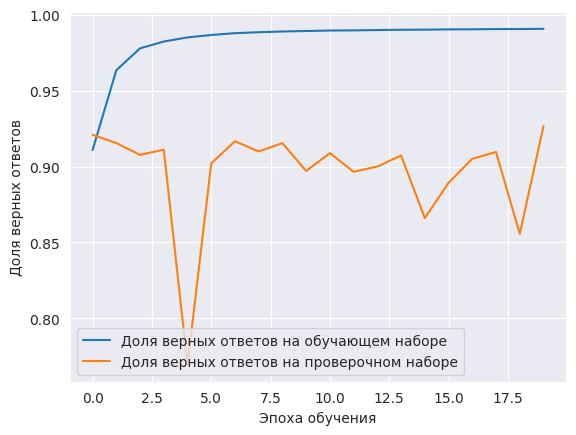

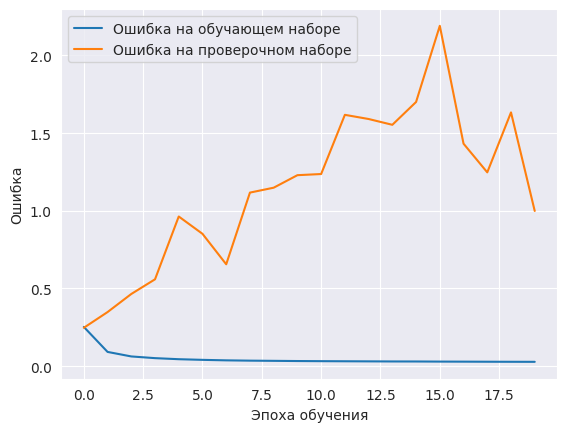

In [63]:
import time
start_time = time.time() # счетчик времени
history = model7_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=256,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [64]:
model7_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model7_db_bal_new.keras')

In [67]:
loss, acc7 = model7_cl.evaluate(x_test, y_test, verbose=0) #classification

In [ ]:
acc7

0.963310182094574

24008/24008 [==============================] - 41s 2ms/step
[[317084  47882      7]
 [ 20991 382284      3]
 [     0      0      0]]


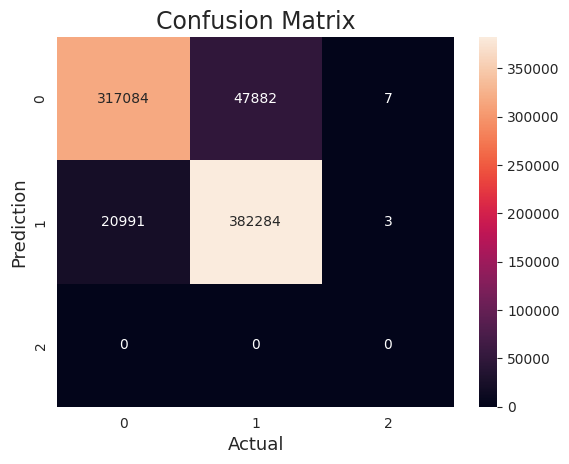

Accuracy   : 0.9103378973798928


In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model7_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

#Модель8 (selu, Nadam, Dence (64,32,4)) = test 96,3% (Модель 1 + уменьшен Batch_size до 32)

In [69]:

number_of_cols = x_train.shape[1]

model8_cl = Sequential() # Последовательная модель нейронной сети

model8_cl.add(Dense(64, input_dim=number_of_cols, activation='selu'))
#model8_cl.add(BatchNormalization())
model8_cl.add(Dense(32, activation='selu'))
#model8_cl.add(Dense(32, activation='relu'))
model8_cl.add(Dense(4, activation='softmax'))

model8_cl.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                2432      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 4)                 132       
                                                                 
Total params: 4,644
Trainable params: 4,644
Non-trainable params: 0
_________________________________________________________________


In [70]:
model8_cl.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [71]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 4), (672489, 37), (672489, 4))

Epoch 1/10
77624/77624 [==============================] - 204s 3ms/step - loss: 0.1817 - accuracy: 0.9289 - val_loss: 0.1256 - val_accuracy: 0.9498
Epoch 2/10
77624/77624 [==============================] - 189s 2ms/step - loss: 0.1118 - accuracy: 0.9526 - val_loss: 0.1053 - val_accuracy: 0.9589
Epoch 3/10
77624/77624 [==============================] - 188s 2ms/step - loss: 0.0938 - accuracy: 0.9590 - val_loss: 0.0881 - val_accuracy: 0.9629
Epoch 4/10
77624/77624 [==============================] - 191s 2ms/step - loss: 0.0871 - accuracy: 0.9615 - val_loss: 0.0922 - val_accuracy: 0.9601
Epoch 5/10
77624/77624 [==============================] - 196s 3ms/step - loss: 0.0828 - accuracy: 0.9633 - val_loss: 0.0906 - val_accuracy: 0.9635
Epoch 6/10
77624/77624 [==============================] - 195s 3ms/step - loss: 0.0795 - accuracy: 0.9648 - val_loss: 0.0806 - val_accuracy: 0.9673
Epoch 7/10
77624/77624 [==============================] - 210s 3ms/step - loss: 0.0767 - accuracy: 0.9658 - val_

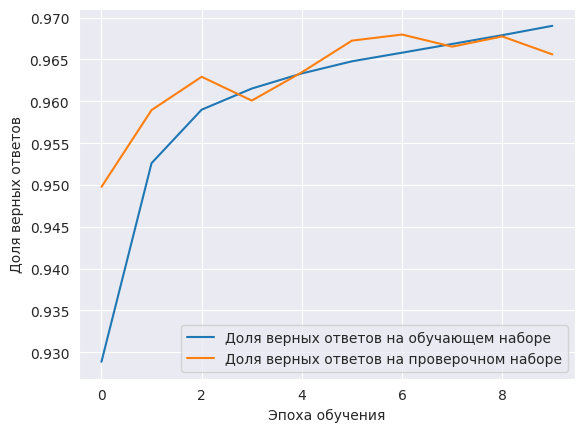

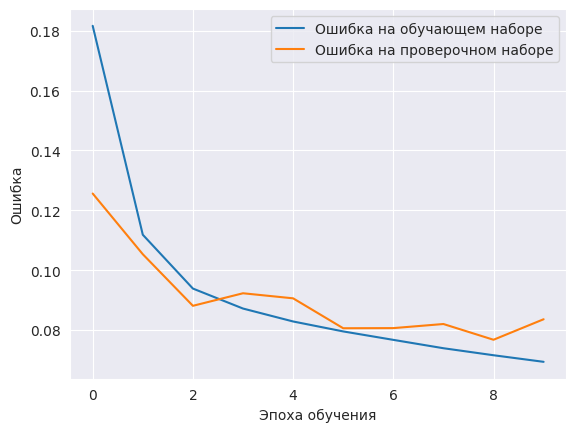

In [72]:
import time
start_time = time.time() # счетчик времени
history = model8_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=10,                             # Количество эпох
                        batch_size=32,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [73]:
model8_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model8_db_bal_new.keras')

In [76]:
loss, acc8 = model8_cl.evaluate(x_test, y_test, verbose=0) #classification

In [77]:
acc8

0.963226854801178

24008/24008 [==============================] - 36s 1ms/step
[[346798  18175]
 [ 10076 393202]]


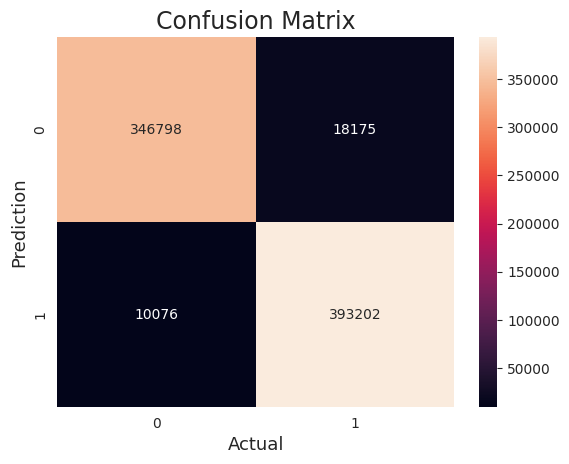

Accuracy   : 0.9632268620541984


In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model8_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

#Модель9 (selu, Nadam, Dence (64,32,4)) = test 96,98%

In [79]:

number_of_cols = x_train.shape[1]

model9_cl = Sequential() # Последовательная модель нейронной сети

model9_cl.add(Dense(64, input_dim=number_of_cols, activation='selu'))
#model9_cl.add(BatchNormalization())
model9_cl.add(Dense(32, activation='selu'))
#model9_cl.add(Dense(32, activation='relu'))
model9_cl.add(Dense(4, activation='softmax'))

model9_cl.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                2432      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 4)                 132       
                                                                 
Total params: 4,644
Trainable params: 4,644
Non-trainable params: 0
_________________________________________________________________


In [80]:
model9_cl.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [81]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 4), (672489, 37), (672489, 4))

Epoch 1/50
77624/77624 [==============================] - 209s 3ms/step - loss: 0.1791 - accuracy: 0.9271 - val_loss: 0.1341 - val_accuracy: 0.9445
Epoch 2/50
77624/77624 [==============================] - 218s 3ms/step - loss: 0.1142 - accuracy: 0.9510 - val_loss: 0.1012 - val_accuracy: 0.9572
Epoch 3/50
77624/77624 [==============================] - 203s 3ms/step - loss: 0.0925 - accuracy: 0.9587 - val_loss: 0.0996 - val_accuracy: 0.9554
Epoch 4/50
77624/77624 [==============================] - 200s 3ms/step - loss: 0.0824 - accuracy: 0.9629 - val_loss: 0.1085 - val_accuracy: 0.9541
Epoch 5/50
77624/77624 [==============================] - 218s 3ms/step - loss: 0.0768 - accuracy: 0.9654 - val_loss: 0.0787 - val_accuracy: 0.9664
Epoch 6/50
77624/77624 [==============================] - 201s 3ms/step - loss: 0.0729 - accuracy: 0.9673 - val_loss: 0.0766 - val_accuracy: 0.9678
Epoch 7/50
77624/77624 [==============================] - 201s 3ms/step - loss: 0.0698 - accuracy: 0.9688 - val_

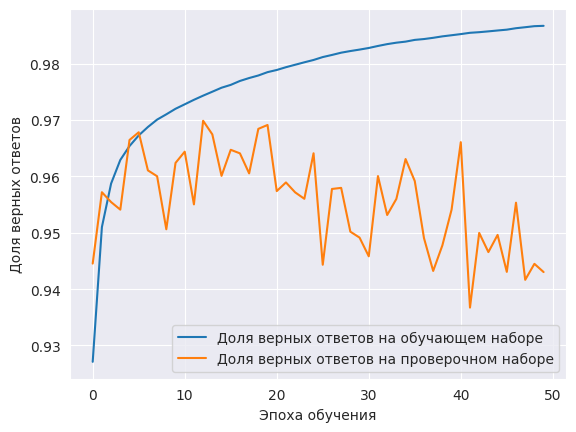

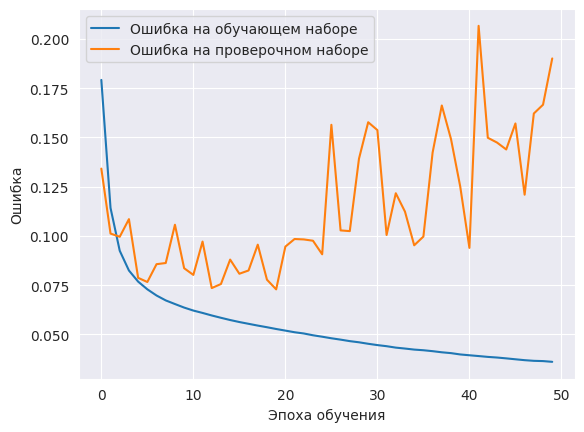

In [82]:
import time
start_time = time.time() # счетчик времени
history = model9_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=50,                             # Количество эпох
                        batch_size=32,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [83]:
model9_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model9_db_bal_new.keras')

In [86]:
loss, acc9 = model9_cl.evaluate(x_test, y_test, verbose=0) #classification

In [87]:
acc9

0.9697950482368469

24008/24008 [==============================] - 36s 1ms/step
[[361369   3604]
 [ 19601 383677]]


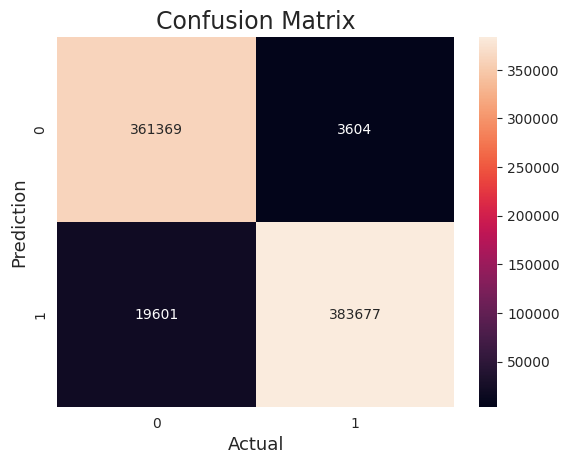

Accuracy   : 0.9697950279270707


In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model9_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

#Модель10 (selu, Nadam, Dence (64,32,4), batch_size=512) = test 95,93%

In [11]:

number_of_cols = x_train.shape[1]

model10_cl = Sequential() # Последовательная модель нейронной сети

model10_cl.add(Dense(64, input_dim=number_of_cols, activation='selu'))
#model10_cl.add(BatchNormalization())
model10_cl.add(Dense(32, activation='selu'))
#model10_cl.add(Dense(32, activation='relu'))
model10_cl.add(Dense(4, activation='softmax'))

model10_cl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,644
Trainable params: 4,644
Non-trainable params: 0
_________________________________________________________________


In [12]:
model10_cl.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [13]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 4), (672489, 37), (672489, 4))

Epoch 1/20
4852/4852 [==============================] - 36s 7ms/step - loss: 0.3433 - accuracy: 0.8593 - val_loss: 0.2181 - val_accuracy: 0.9032
Epoch 2/20
4852/4852 [==============================] - 23s 5ms/step - loss: 0.1819 - accuracy: 0.9248 - val_loss: 0.1700 - val_accuracy: 0.9305
Epoch 3/20
4852/4852 [==============================] - 29s 6ms/step - loss: 0.1554 - accuracy: 0.9387 - val_loss: 0.1465 - val_accuracy: 0.9406
Epoch 4/20
4852/4852 [==============================] - 26s 5ms/step - loss: 0.1377 - accuracy: 0.9437 - val_loss: 0.1317 - val_accuracy: 0.9459
Epoch 5/20
4852/4852 [==============================] - 26s 5ms/step - loss: 0.1249 - accuracy: 0.9474 - val_loss: 0.1205 - val_accuracy: 0.9516
Epoch 6/20
4852/4852 [==============================] - 25s 5ms/step - loss: 0.1149 - accuracy: 0.9507 - val_loss: 0.1144 - val_accuracy: 0.9524
Epoch 7/20
4852/4852 [==============================] - 26s 5ms/step - loss: 0.1070 - accuracy: 0.9537 - val_loss: 0.1077 - val_ac

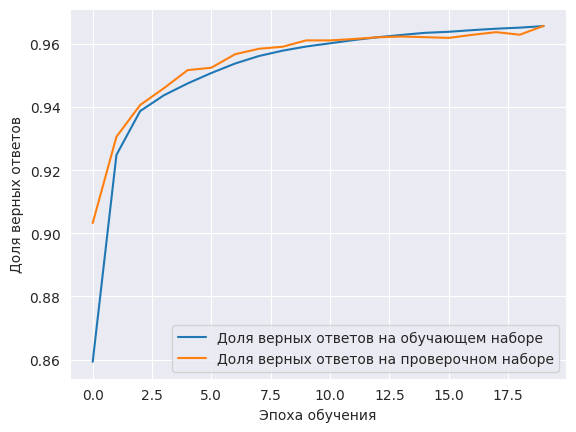

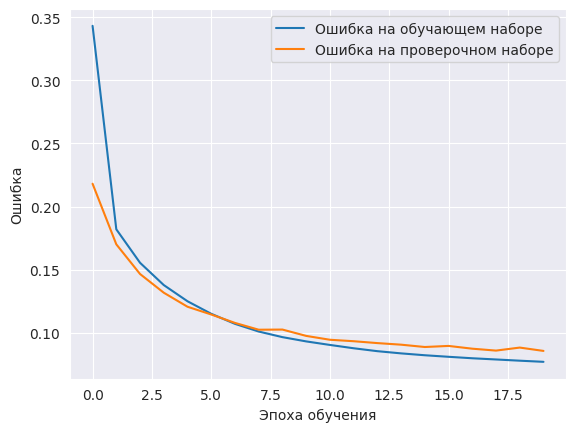

In [14]:
import time
start_time = time.time() # счетчик времени
history = model10_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=512,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [15]:
model10_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model10_db_bal_new.keras')

In [16]:
loss, acc10 = model10_cl.evaluate(x_test, y_test, verbose=0) #classification

In [17]:
acc10

0.9593726396560669

24008/24008 [==============================] - 44s 2ms/step
[[347300  17673]
 [ 13539 389739]]


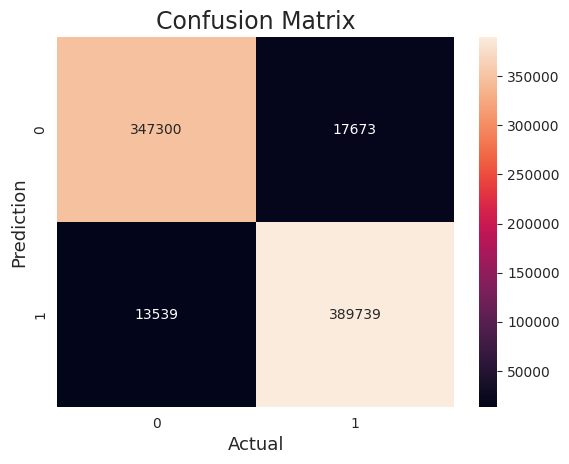

Accuracy   : 0.95937265294806


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model10_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

#Модель11 (selu, Nadam, Dence (64,32,4), batch_size=1024) = test 95,36%

In [11]:

number_of_cols = x_train.shape[1]

model11_cl = Sequential() # Последовательная модель нейронной сети

model11_cl.add(Dense(64, input_dim=number_of_cols, activation='selu'))
#model11_cl.add(BatchNormalization())
model11_cl.add(Dense(32, activation='selu'))
#model11_cl.add(Dense(32, activation='relu'))
model11_cl.add(Dense(4, activation='softmax'))

model11_cl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 4,644
Trainable params: 4,644
Non-trainable params: 0
_________________________________________________________________


In [12]:
model11_cl.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [13]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 4), (672489, 37), (672489, 4))

Epoch 1/20
2426/2426 [==============================] - 28s 10ms/step - loss: 0.4635 - accuracy: 0.8225 - val_loss: 0.2784 - val_accuracy: 0.8841
Epoch 2/20
2426/2426 [==============================] - 14s 6ms/step - loss: 0.2412 - accuracy: 0.8979 - val_loss: 0.2065 - val_accuracy: 0.9096
Epoch 3/20
2426/2426 [==============================] - 15s 6ms/step - loss: 0.1836 - accuracy: 0.9229 - val_loss: 0.1741 - val_accuracy: 0.9272
Epoch 4/20
2426/2426 [==============================] - 15s 6ms/step - loss: 0.1626 - accuracy: 0.9347 - val_loss: 0.1602 - val_accuracy: 0.9344
Epoch 5/20
2426/2426 [==============================] - 16s 7ms/step - loss: 0.1519 - accuracy: 0.9387 - val_loss: 0.1496 - val_accuracy: 0.9376
Epoch 6/20
2426/2426 [==============================] - 15s 6ms/step - loss: 0.1421 - accuracy: 0.9418 - val_loss: 0.1409 - val_accuracy: 0.9395
Epoch 7/20
2426/2426 [==============================] - 14s 6ms/step - loss: 0.1326 - accuracy: 0.9447 - val_loss: 0.1299 - val_a

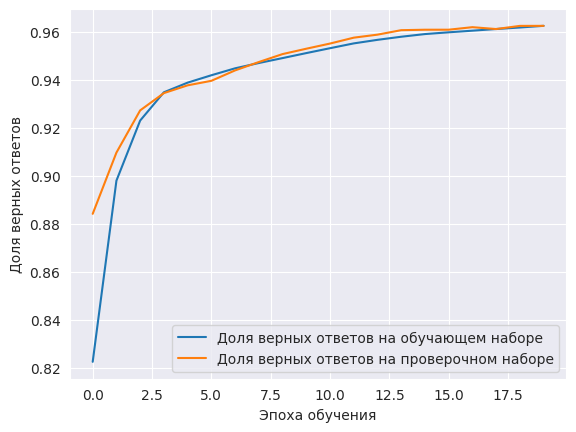

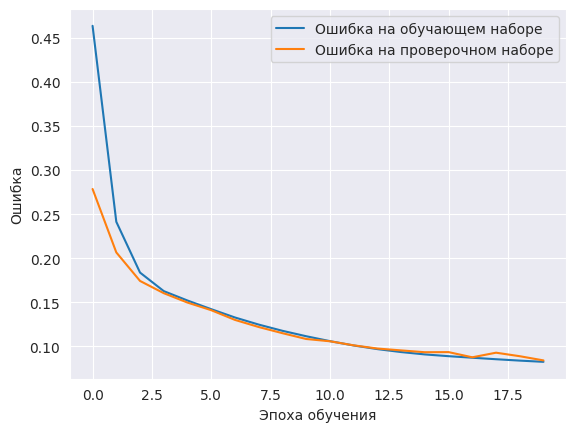

In [14]:
import time
start_time = time.time() # счетчик времени
history = model11_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=1024,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [15]:
model11_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model11_db_bal_new.keras')

In [16]:
loss, acc11 = model11_cl.evaluate(x_test, y_test, verbose=0) #classification

In [17]:
acc11

0.9536948204040527

24008/24008 [==============================] - 36s 1ms/step
[[336390  28583]
 [  6991 396287]]


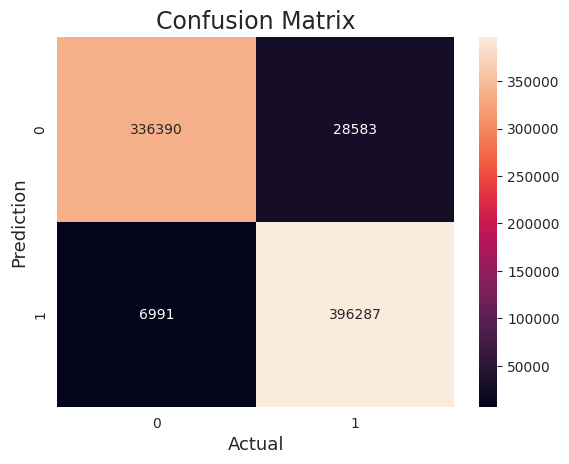

Accuracy   : 0.9536948210936269


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model11_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

# Анализ

In [ ]:
# imports

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# # reading the dataset

# df = pd.read_csv('winequality-red.csv')

# # preprocessing
# df['target'] = np.where(df['quality']>5, 1, 0)
# df2 = df.drop(['quality'],axis=1)
# X = df2.drop(['target'],axis=1)
# y = df2[['target']]

# initializing random forest
rf = RandomForestClassifier()

# grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(x_val,y_val)

# grid search results
print('Best grid search hyperparameters are: '+str(model_grid.best_params_))
print('Best grid search score is: '+str(model_grid.best_score_))

# random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
          }

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(x_val,y_val)

# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

#test optimizers

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K

In [ ]:
batch_size = 64
num_classes = 4
epochs = 10

In [ ]:
def build_model(optimizer):
 model = Sequential()
 model.add(Dense(544,activation='relu'))
 model.add(Dropout(0.25))
 model.add(Flatten())
 model.add(Dense(384, activation='relu'))
 model.add(Dropout(0.5))
 model.add(Dense(num_classes, activation='softmax'))
 model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])
 return model

In [ ]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

In [ ]:
for i in optimizers:
  model = build_model(i)

hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
38812/38812 [==============================] - 350s 9ms/step - loss: 0.4688 - accuracy: 0.7969 - val_loss: 1.0644 - val_accuracy: 0.5184
Epoch 2/10
38812/38812 [==============================] - 312s 8ms/step - loss: 0.3518 - accuracy: 0.8540 - val_loss: 0.2392 - val_accuracy: 0.9057
Epoch 3/10
38812/38812 [==============================] - 325s 8ms/step - loss: 0.2884 - accuracy: 0.8829 - val_loss: 0.4939 - val_accuracy: 0.6944
Epoch 4/10
38812/38812 [==============================] - 335s 9ms/step - loss: 0.2658 - accuracy: 0.8910 - val_loss: 0.2092 - val_accuracy: 0.9091
Epoch 5/10
38812/38812 [==============================] - 297s 8ms/step - loss: 0.2623 - accuracy: 0.8947 - val_loss: 0.2478 - val_accuracy: 0.9028
Epoch 6/10
38812/38812 [==============================] - 288s 7ms/step - loss: 0.2500 - accuracy: 0.9019 - val_loss: 0.2230 - val_accuracy: 0.9189
Epoch 7/10
38812/38812 [==============================] - 295s 8ms/step - loss: 0.2413 - accuracy: 0.9069 - val_

In [ ]:

number_of_cols = x_train.shape[1]

model12_cl = Sequential() # Последовательная модель нейронной сети

model12_cl.add(Dense(544, input_dim=number_of_cols, activation='elu'))
#model12_cl.add(BatchNormalization())
model12_cl.add(Dense(384, activation='elu'))
#model12_cl.add(Dense(32, activation='relu'))
model12_cl.add(Dense(4, activation='softmax'))

model12_cl.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 544)               20672     
                                                                 
 dense_46 (Dense)            (None, 384)               209280    
                                                                 
 dense_47 (Dense)            (None, 4)                 1540      
                                                                 
Total params: 231,492
Trainable params: 231,492
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model12_cl.compile(optimizer=Nadam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape,

((2483963, 37), (2483963, 4), (672489, 37), (672489, 4))

Epoch 1/20
9703/9703 [==============================] - 35s 4ms/step - loss: 0.4322 - accuracy: 0.8776 - val_loss: 0.1988 - val_accuracy: 0.9145
Epoch 2/20
9703/9703 [==============================] - 32s 3ms/step - loss: 0.1702 - accuracy: 0.9320 - val_loss: 0.1621 - val_accuracy: 0.9352
Epoch 3/20
9703/9703 [==============================] - 34s 4ms/step - loss: 0.1513 - accuracy: 0.9406 - val_loss: 0.1649 - val_accuracy: 0.9302
Epoch 4/20
9703/9703 [==============================] - 35s 4ms/step - loss: 0.1400 - accuracy: 0.9438 - val_loss: 0.1436 - val_accuracy: 0.9418
Epoch 5/20
9703/9703 [==============================] - 33s 3ms/step - loss: 0.1309 - accuracy: 0.9464 - val_loss: 0.1345 - val_accuracy: 0.9449
Epoch 6/20
9703/9703 [==============================] - 33s 3ms/step - loss: 0.1229 - accuracy: 0.9488 - val_loss: 0.1296 - val_accuracy: 0.9457
Epoch 7/20
9703/9703 [==============================] - 33s 3ms/step - loss: 0.1162 - accuracy: 0.9508 - val_loss: 0.1165 - val_ac

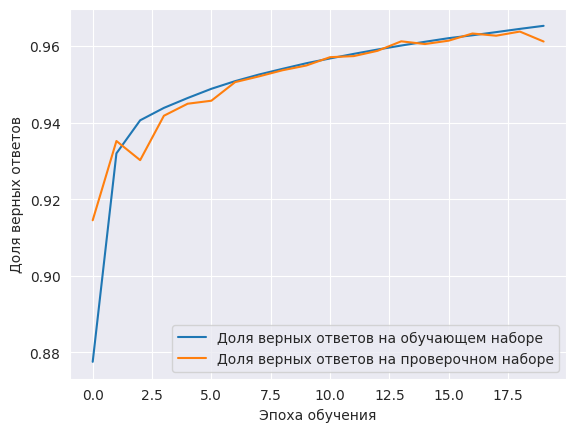

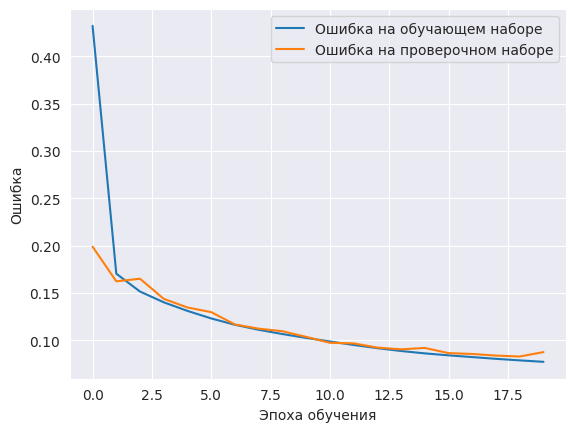

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model12_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=20,                             # Количество эпох
                        batch_size=256,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_val, y_val))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model12_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model_db_bal_new.keras')

In [ ]:
loss, acc = model12_cl.evaluate(x_test, y_test, verbose=0) #classification


RuntimeError: ignored

In [ ]:
acc

0.9583560824394226

24008/24008 [==============================] - 39s 2ms/step
[[341469  23504]
 [  8489 394789]]


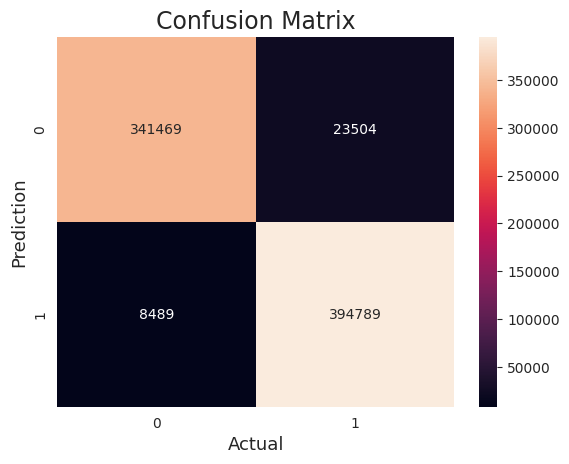

Accuracy   : 0.9583560581112163


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# compute the confusion matrix
y_pred=model12_cl.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

In [ ]:
#проверка работы сохраненной модели
model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model_all_1.keras')